# KNN Classification: Donut Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [28]:
class KNNClassifier():
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X, K, epsilon = 1e-2):
        N, D = X.shape
        y_hat = np.empty(N)
    
        for i in range(N):
            sq_dist = np.sum((X - self.X[i])**2, axis = 1) #(self.X - X[1])  self.X NxD difference row wise results in an N dim array
            idx = sq_dist.argsort()[:K] #returns the idx of K in ascending order
            gamma = 1 / (np.sqrt(sq_dist[idx]) + epsilon)
            y_hat[i] = np.bincount(self.y[idx], weights = gamma).argmax() #providing the highest weighted count
        
        return y_hat
    
    def accuracy(self, X, y, K, epsilon = 1e-2):
        y_hat = self.predict(X, K, epsilon)
        return np.mean(y == y_hat)

In [3]:
#Import data file
data = pd.read_csv("donut.csv", header = None)

In [4]:
data.head()

,0
0,1.823942360433377097e+00 -1.146120866951919892...
1,7.502854598957227061e-01 1.064485258017476843e...
2,1.577960703558637601e+00 1.125407965407776434e...
3,3.932518160242990390e-01 -5.476939453545561776...
4,2.463078900648939751e+00 -8.489925711833897770...


In [9]:
#Split column
df = data.iloc[:,0].str.split(expand=True)
df.head()

,0,1,2
0,1.823942360433377097e+00,-1.146120866951919892e-01,0.000000000000000000e+00
1,7.502854598957227061e-01,1.064485258017476843e+00,0.000000000000000000e+00
2,1.577960703558637601e+00,1.125407965407776434e+00,0.000000000000000000e+00
3,3.932518160242990390e-01,-5.476939453545561776e-01,0.000000000000000000e+00
4,2.463078900648939751e+00,-8.489925711833897770e-01,0.000000000000000000e+00


In [10]:
#Convert data str to float
df[0] = df[0].astype(float)
df[1] = df[1].astype(float)
df[2] = df[2].astype(float).astype(int)
df.head()

,0,1,2
0,1.823942,-0.114612,0
1,0.750285,1.064485,0
2,1.577961,1.125408,0
3,0.393252,-0.547694,0
4,2.463079,-0.848993,0


In [11]:
df.tail()

,0,1,2
3995,5.870650,-1.606308,1
3996,4.733952,0.127538,1
3997,6.593012,-1.708109,1
3998,4.404825,-0.115727,1
3999,4.045071,0.095259,1


In [12]:
#Divide data into variables and target
X = df.drop([2], axis=1).to_numpy()
y = df[2].to_numpy()

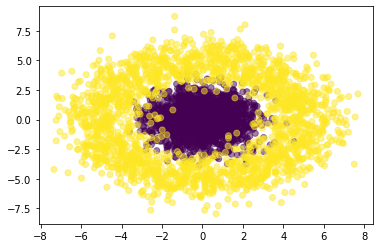

In [13]:
#Plot the variables and target
plt.figure()
plt.scatter(X[:,0],X[:,1], c=y, alpha=0.5)
plt.show()

In [14]:
def shuffle(*args):
    """Take multiple arrays of the same length and shuffle row-wise"""
    idx = np.random.permutation(len(args[0]))
    return [X[idx] for X in args]

In [15]:
#Shuffle data
X, y = shuffle(X, y)

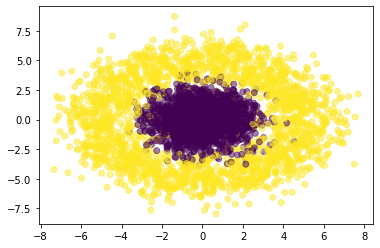

In [16]:
#Plot data
plt.figure()
plt.scatter(X[:,0],X[:,1], c=y, alpha=0.5)
plt.show()

In [61]:
#Instantiate model, fit data, print accuracy
knn = KNNClassifier()
knn.fit(X, y)
print(f"Accuarcy: {knn.accuracy(X, y, 5)}")

Accuarcy: 1.0


The donut data isn't linearly separable and therefore a linear model would not accurately classify the data. The KNN Classification model does a great job separating the classes. Since KNN is a memory-based algorithm the accuracy will be perfect because the data for that point is already in memory, so classification is easy and accurate.